# Random Forest Generator

### How privacy and resemblance scores vary with the probability of changing a value ? 
(The proportion of artifical values)

In [9]:
data_dir = '../data'

datasets = {'iris': (data_dir + '/iris', 'iris'),
            'iris_1': (data_dir + '/iris_1', 'iris'),
            'iris_2': (data_dir + '/iris_2', 'iris'),
            'mimic': (data_dir + '/mimic', 'mimic'),
            'mushrooms': (data_dir + '/mushrooms', 'mushrooms'),
            'chems': (data_dir + '/chems', 'chems'),
            'credit': (data_dir + '/credit_data', 'credit'),
            'squares': (data_dir + '/squares', 'squares'),
            'squares_2': (data_dir + '/squares_2', 'squares')}

# Dataset
input_dir, basename = datasets['squares']

In [10]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sys import path

# AutoML and Comparator
path.append('../data_manager/')
path.append('../generators/')
%matplotlib inline
%load_ext autoreload
%autoreload 2

from auto_ml import AutoML
from comparator import Comparator

# Generator
from rf_generator import RF_generator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Train the generator

In [11]:
gen = RF_generator(AutoML(input_dir, basename))
gen.fit()

### Generate data and compute scores

In [12]:
gen.generate_to_automl("../data/squares_rf_1", "squares", p=1)

Threshold: 0.1


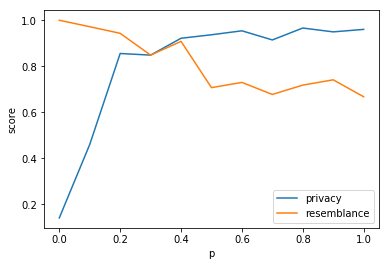

Threshold: 0.3


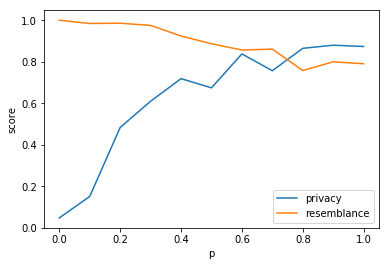

Threshold: 0.5


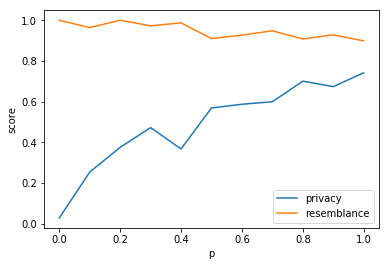

In [4]:
for threshold in [0.1, 0.3, 0.5]:
    x = np.arange(0, 1.1, 0.1)
    ps = [] # privacy
    rs = [] # resemblance
    for p in x:
        # Generation
        folder_name = '../data/'+basename+'_rf_'+str(p)
        gen_basename = basename+'_rf'
        ds = gen.generate_to_automl(folder_name, gen_basename, p=p)
        
        # Comparator for metric testing
        comparator = Comparator(AutoML(input_dir, basename), ds)
        comparator.compute_mda(norm='manhattan', precision=0.01, threshold=threshold)
        
        # TODO class MDA
        (_, _), (privacy1, resemblance1), _ = comparator.mda1
        ps.append(privacy1)
        rs.append(resemblance1)
        #(_, _), (privacy2, resemblance2), _ = comparator.mda2
        
    print('Threshold: {}'.format(threshold))
    plt.plot(x, ps, label='privacy')
    plt.plot(x, rs, label='resemblance')
    #plt.plot(x, ps, label='threshold='+str(threshold))
    #plt.plot(x, rs, label='threshold='+str(threshold))
    plt.ylabel('score')
    plt.xlabel('p')
    plt.legend()
    plt.show()

DS1


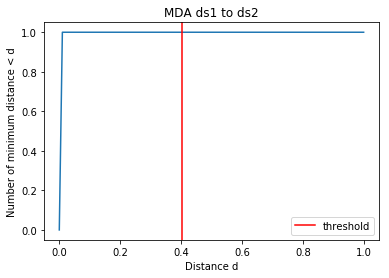

** Privacy: **0.03541666666666654

** Resemblance: **1.0000000000000002

DS2


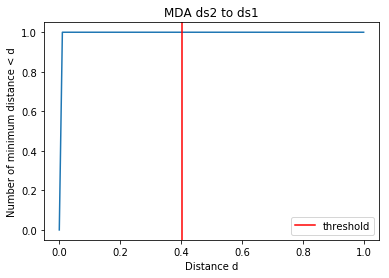

** Privacy:** 0.03541666666666654

** Resemblance:** 1.0000000000000002

DS1


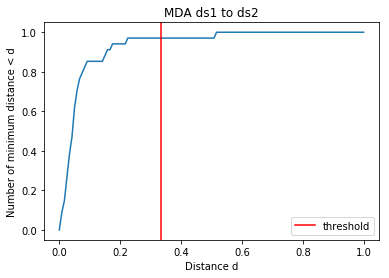

** Privacy: **0.21194852941176479

** Resemblance: **0.9920343137254902

DS2


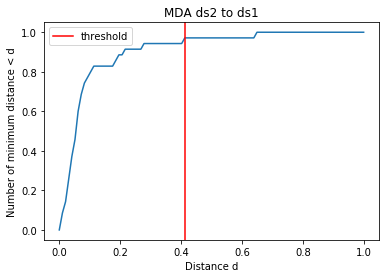

** Privacy:** 0.2344642857142858

** Resemblance:** 0.9887218045112782

DS1


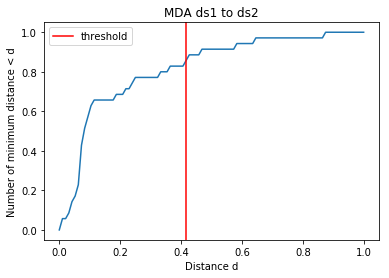

** Privacy: **0.3995238095238097

** Resemblance: **0.9562925170068028

DS2


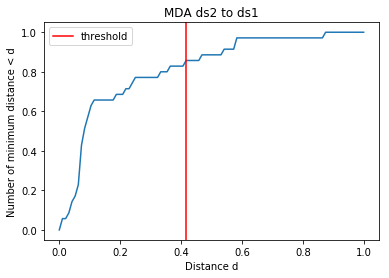

** Privacy:** 0.3995238095238097

** Resemblance:** 0.9535714285714287

DS1


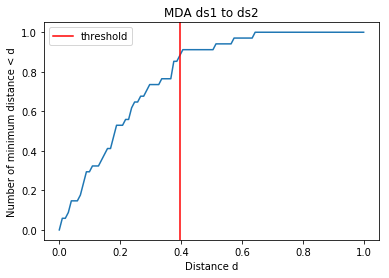

** Privacy: **0.5348039215686273

** Resemblance: **0.9740035358405659

DS2


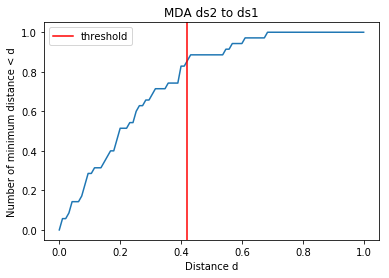

** Privacy:** 0.5480952380952382

** Resemblance:** 0.9649783549783546

DS1


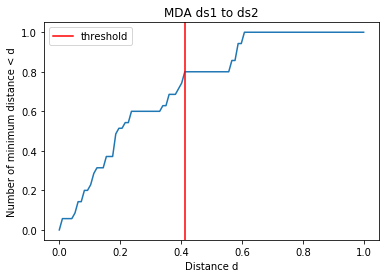

** Privacy: **0.5856547619047618

** Resemblance: **0.9421052631578948

DS2


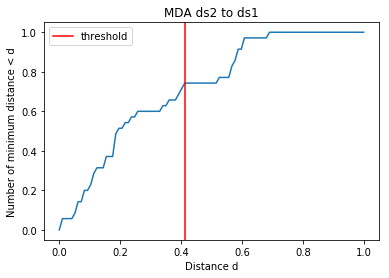

** Privacy:** 0.590297619047619

** Resemblance:** 0.9240601503759397

DS1


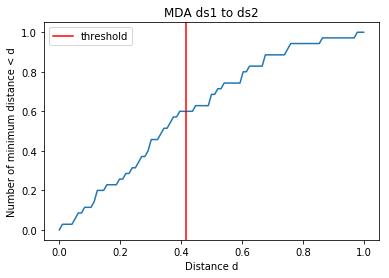

** Privacy: **0.7245833333333334

** Resemblance: **0.845578231292517

DS2


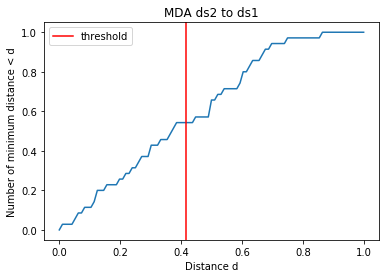

** Privacy:** 0.7367261904761906

** Resemblance:** 0.8537414965986394

DS1


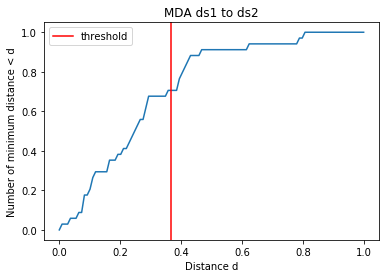

** Privacy: **0.6463235294117646

** Resemblance: **0.9335038363171356

DS2


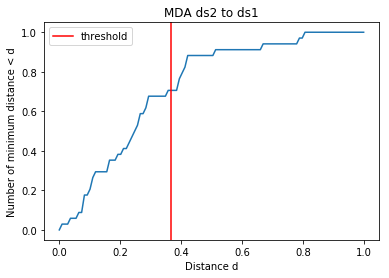

** Privacy:** 0.6448529411764705

** Resemblance:** 0.9296675191815856

DS1


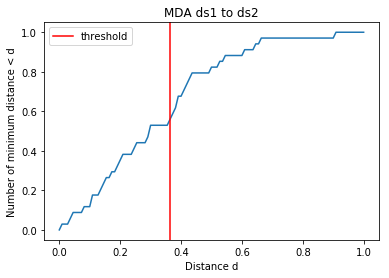

** Privacy: **0.7190563725490196

** Resemblance: **0.9029411764705882

DS2


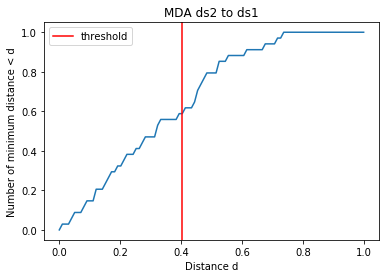

** Privacy:** 0.6963235294117647

** Resemblance:** 0.9103107344632769

DS1


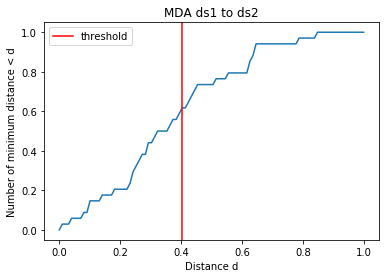

** Privacy: **0.7477941176470588

** Resemblance: **0.8850947158524428

DS2


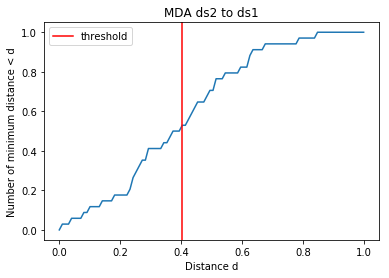

** Privacy:** 0.7775122549019609

** Resemblance:** 0.873379860418744

DS1


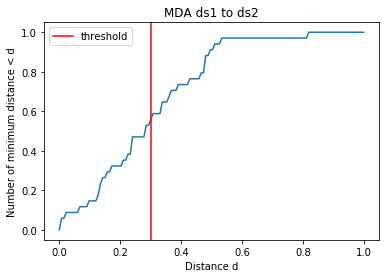

** Privacy: **0.7513480392156863

** Resemblance: **0.9059403331224961

DS2


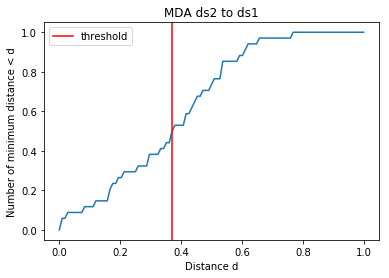

** Privacy:** 0.778921568627451

** Resemblance:** 0.8827854671280274

DS1


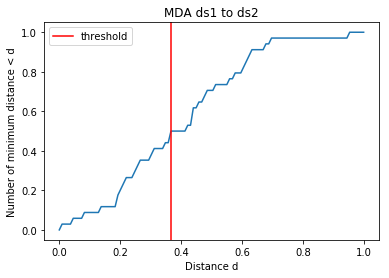

** Privacy: **0.8069240196078431

** Resemblance: **0.8463341858482525

DS2


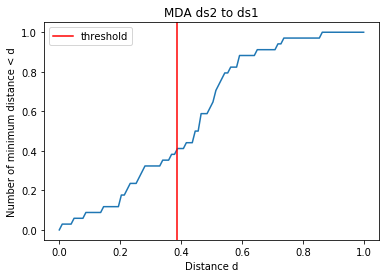

** Privacy:** 0.8253063725490196

** Resemblance:** 0.8464052287581699

In [5]:
threshold = 0.4
x = np.arange(0, 1.1, 0.1)
for p in x:
    # Generation
    folder_name = '../data/'+basename+'_rf_'+str(p)
    gen_basename = basename+'_rf'
    ds = gen.generate_to_automl(folder_name, gen_basename, p=p)

    # Comparator for metric testing
    comparator = Comparator(AutoML(input_dir, basename), ds)
    comparator.compute_mda(norm='manhattan', precision=0.01, threshold=threshold)

    comparator.show_mda()

In [6]:
# Other comparator functions

#comparator.show_descriptors()
#comparator.show_comparison_matrix()

#comparator.show_classifier_score()

#from sklearn.ensemble import RandomForestClassifier
#comparator.show_classifier_score(clf=RandomForestClassifier(n_estimators=200))